In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import datetime as dt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [147]:
df_GlobalLandTemperaturesByCountry=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCountry.csv')

In [148]:
#df_GlobalLandTemperaturesByCountry.head(5)

In [149]:
#type(df_GlobalLandTemperaturesByCountry['dt'].iloc[1])

In [150]:
df_India=df_GlobalLandTemperaturesByCountry[df_GlobalLandTemperaturesByCountry['Country']=="India"].dropna()

In [151]:
df_India.reset_index(inplace=True,drop=True)

In [152]:
df_GlobalLandTemperaturesByCountry['dt']=pd.to_datetime(df_GlobalLandTemperaturesByCountry.dt)

In [ ]:
#df_India.head()

In [95]:
#type(df_GlobalLandTemperaturesByCountry['dt'].iloc[1])

In [153]:
df_India['dt']=pd.to_datetime(df_India['dt'])

In [154]:
df_India['year']=df_India['dt'].map(lambda x : x.year)

In [155]:
max_temp=df_India['year'].max()

In [156]:
#max_temp

In [159]:
time_period=range(1913,2013)

In [161]:
average_temperature=[]
for year in time_period:
    average_temperature.append(df_India[df_India['year']==year]['AverageTemperature'].mean())

In [ ]:
#average_temperature

<IPython.core.display.Javascript object>


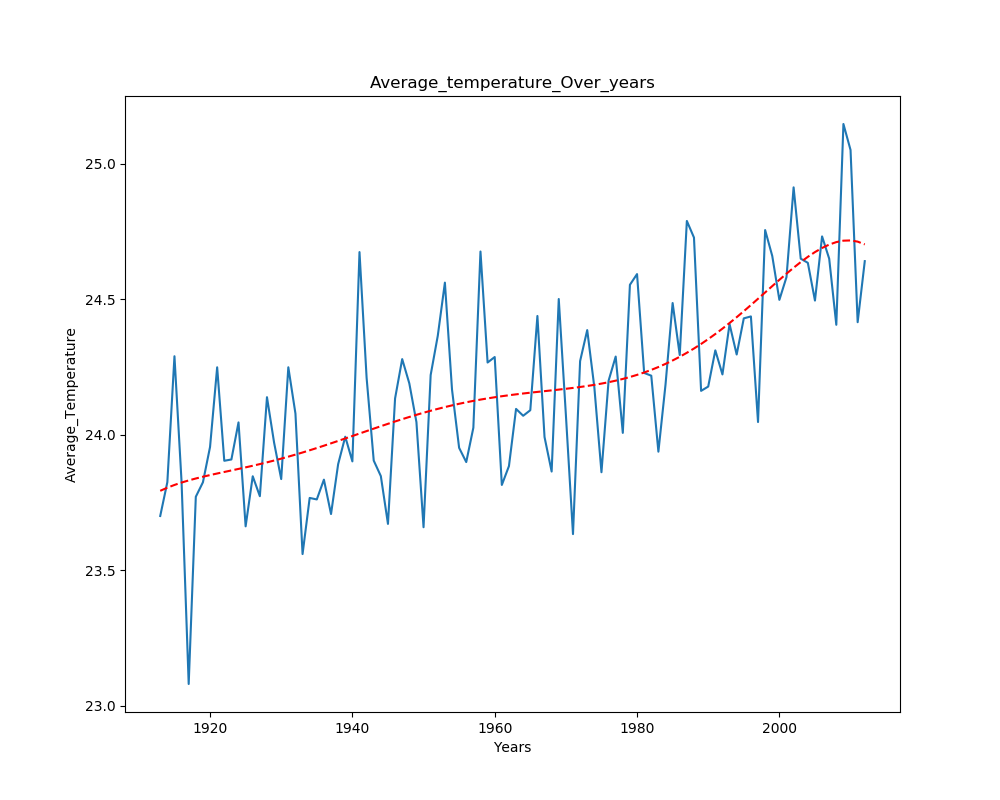

In [162]:
plt.figure(figsize=(10,8))
plt.plot(time_period,average_temperature)


In [163]:
plt.xlabel('Years')
plt.ylabel('Average_Temperature')
plt.title('Average_temperature_Over_years')

Text(0.5, 1.0, 'Average_temperature_Over_years')

In [164]:
z=np.polyfit(time_period,average_temperature,10)
p=np.poly1d(z)
plt.plot(time_period,p(time_period),'r--')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [97]:
#z,p,p(time_period)

In [165]:
df_GlobalTemperatures=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalTemperatures.csv')

In [98]:
#df_GlobalTemperatures.head(5)

In [166]:
df_GlobalTemperatures['dt']=pd.to_datetime(df_GlobalTemperatures['dt'])

In [167]:
df_GlobalTemperatures['year']=df_GlobalTemperatures['dt'].dt.year

In [99]:
#print(df_GlobalTemperatures['year'].min())
#print(df_GlobalTemperatures['year'].max())

In [168]:
year_average=[]
for i in range(1750,2014):
    year_average.append(df_GlobalTemperatures[df_GlobalTemperatures['year']==i]['LandAverageTemperature'].mean())

In [169]:
five_year=[]
year_range=range(1750,2014)
for i in range(1755,2019):
    a=[]
    for j in range(i-5,i):
        a.append(df_GlobalTemperatures[df_GlobalTemperatures['year']==(j-5)]['LandAverageTemperature'].mean())
    five_year.append(sum(a)/float(len(a)))
    

In [170]:
np_year_avg=np.array(year_average)
np_five_year_avg=np.array(five_year)
#print(len(np_year_avg),len(np_five_year_avg))

<IPython.core.display.Javascript object>


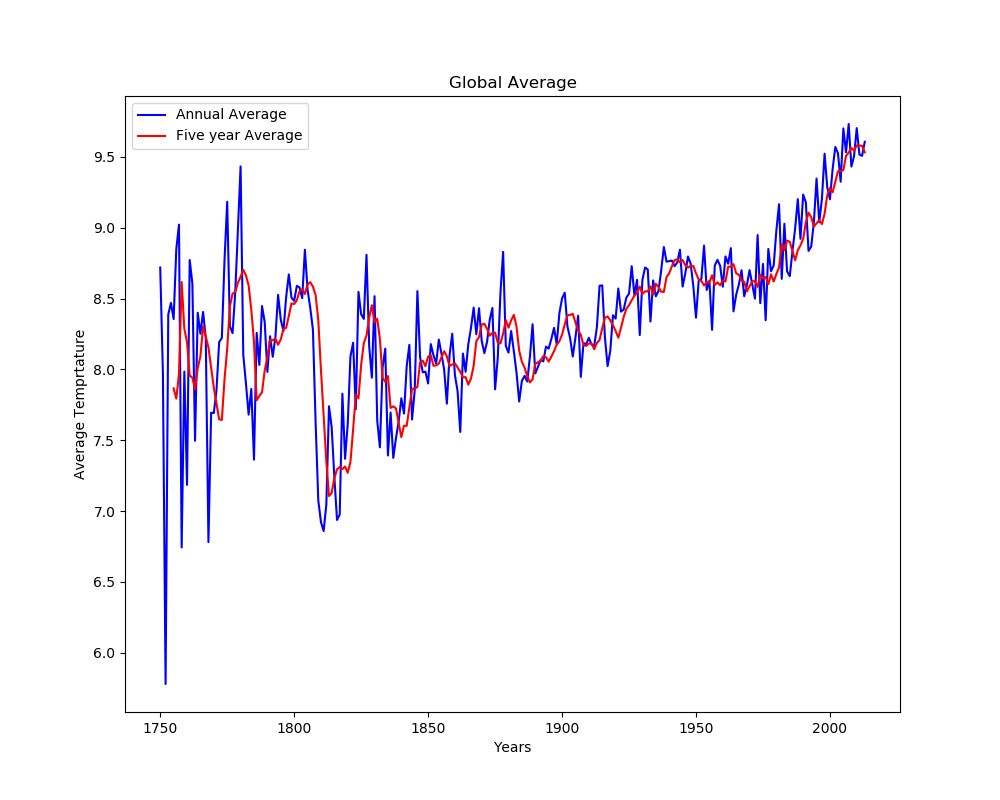

In [171]:
plt.figure(figsize=(10,8))
plt.plot(year_range,year_average,'b',label='Annual Average')
plt.plot(year_range,five_year,'r',label='Five year Average')
plt.title('Global Average')
plt.xlabel('Years')
plt.ylabel('Average Temprtature')
plt.legend()

<IPython.core.display.Javascript object>


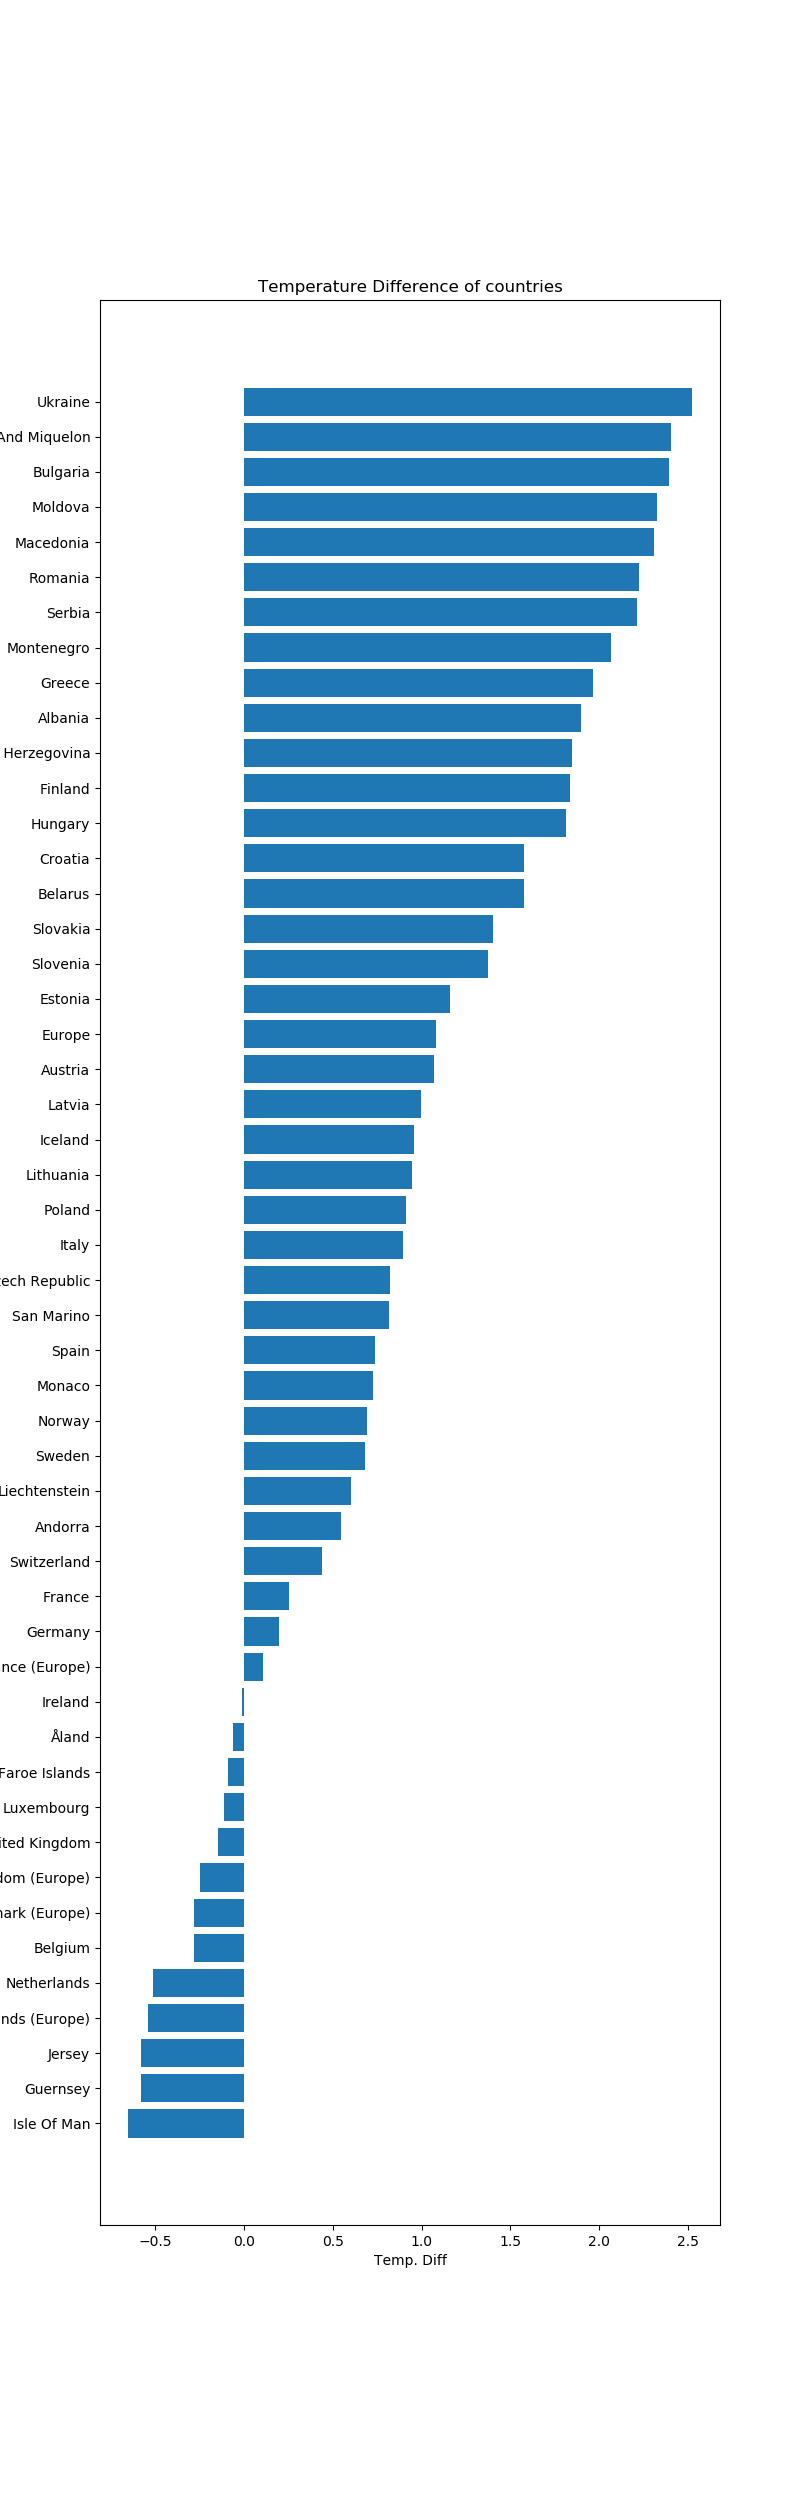

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

Temp_data=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCountry.csv')

Temp_data['dt']=pd.to_datetime(Temp_data.dt)
Temp_data['year']=Temp_data['dt'].map(lambda x: x.year)
Temp_data=Temp_data.dropna()

grouped_data=Temp_data['AverageTemperature'].groupby([Temp_data['year'],Temp_data['Country']]).mean()
grouped_dict=grouped_data.to_dict()

Temp={}
countries=Temp_data['Country'].unique()


#adding year 1913 as data for 1750 doesn't contain many countries.
firstYeardata=grouped_data[1750]
lastYeardata=grouped_data[2013]


#removing out the countries whose data is available in only one time period
for country in countries:
    if (country in firstYeardata)==True and (country in lastYeardata)==True:
        Temp[country]=(lastYeardata[country]-firstYeardata[country])

Temp1=sorted(Temp.items(),key=lambda x: x[1]) 
Countries_list=[x for x,y in Temp1]
Temp_diff=[y for x,y in Temp1]

#Plotting
#print(Countries_list)
plt.figure(figsize=(8,25))
ax=plt.subplot()
ax.barh(range(len(Countries_list)),Temp_diff)
plt.yticks(range(len(Countries_list)),Countries_list)
plt.title('Temperature Difference of countries')
plt.xlabel('Temp. Diff')
plt.show()

In [172]:
df_GlobalLandTemperaturesByCity=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCity.csv')

In [173]:
df_indiancities=df_GlobalLandTemperaturesByCity[df_GlobalLandTemperaturesByCity['Country']=='India']

In [174]:
cities_list=df_indiancities['City'].unique()

In [178]:
#len(cities_list)

In [176]:
major_cities=['Delhi','Bombay','Calcutta','Madras','Varanasi','Chandigarh','Dehradun','Jaipur','Hyderabad','Thiruvananthapuram','Vijayawada','Visakhapatnam']

In [179]:
#df_indiancities.columns

In [180]:
col_to_keep=['dt','AverageTemperature','City']
df_indian_cities=df_indiancities.filter(col_to_keep)

In [181]:
df_indian_cities.reset_index(inplace=True,drop=True)

In [182]:
df_indian_cities.tail(5)

,dt,AverageTemperature,City
1014901,2013-05-01,29.286,Yelahanka
1014902,2013-06-01,25.401,Yelahanka
1014903,2013-07-01,24.232,Yelahanka
1014904,2013-08-01,24.493,Yelahanka
1014905,2013-09-01,NaN,Yelahanka


In [183]:
df_indian_cities.dropna(inplace=True)

In [184]:
temp_max=[]
temp_min=[]
city_list=[]
for city in cities_list:
    if (city in major_cities):
        #print(city)
        temp=df_indian_cities[df_indian_cities['City']==city]['AverageTemperature']
        #date=df_indian_cities[df_indian_cities['City']==city]['dt']
        #mcity=df_indian_cities[df_indian_cities['City']==city]['City']
        temp_max.append(temp.max())
        temp_min.append(temp.min())
        city_list.append(city)

In [185]:
#temp_max,temp_min,city_list

In [186]:
df_major_cities=pd.DataFrame({'Tempmax':temp_max,
                             'Tempmin':temp_min,
                              'Mcity':city_list
                             })

In [187]:
#df_major_cities

In [188]:
difference=[]
for td in range(0,len(df_major_cities)):
    tempdifference=df_major_cities['Tempmax'].iloc[td]-df_major_cities['Tempmin'].iloc[td]
    difference.append(tempdifference)

In [190]:
#difference

In [191]:
df_major_cities['Diff']=df_major_cities['Tempmax']-df_major_cities['Tempmin']

In [192]:
#df_major_cities

<IPython.core.display.Javascript object>


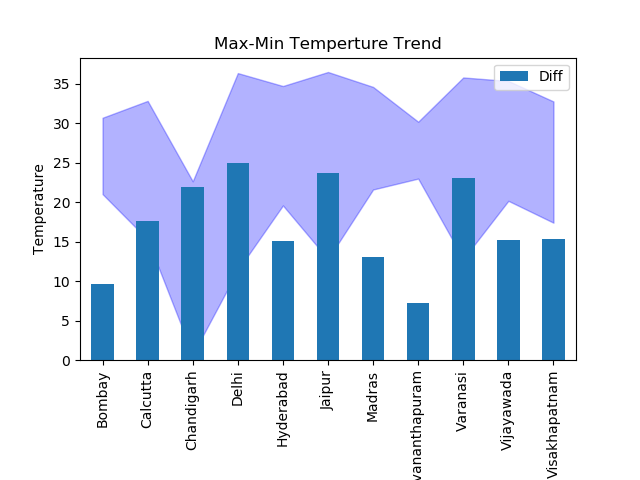

In [205]:
df_major_cities.plot('Mcity','Diff',kind='bar')

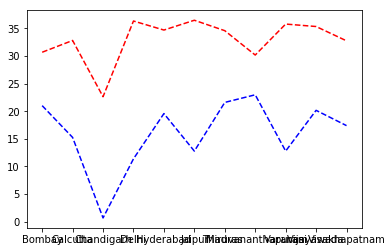

In [28]:
ax=plt.figure()
plt.plot(df_major_cities['Mcity'],df_major_cities['Tempmax'],'--r')
plt.plot(df_major_cities['Mcity'],df_major_cities['Tempmin'],'--b')

In [206]:
plt.fill_between(range(len(df_major_cities['Tempmax'])),df_major_cities['Tempmax'],df_major_cities['Tempmin'],color='blue',alpha=0.3)

In [207]:
ax1=plt.gca()
ax1.set_xlabel('Cities')
ax1.set_ylabel('Temperature')
ax1.set_title('Max-Min Temperture Trend')

Text(0.5, 1.0, 'Max-Min Temperture Trend')

In [208]:
a=plt.gca().xaxis
for items in a.get_ticklabels():
    items.set_rotation(90)
    
plt.subplots_adjust(bottom=0.25)


In [210]:
for ax2 in plt.gcf().get_axes():
    for label in ax2.get_xticklabels()+ax2.get_yticklabels():
        label.set_visible(True)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
#for spine in plt.gca().spines.values():
    #spine.set_visible(False)

In [211]:
def onclick(event):
    plt.gca()
    plt.plot()
    plt.gca().set_title('events at pixel {},{} and data {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

6

In [212]:
import matplotlib.animation as animation

In [213]:
#df_indian_cities.head(10)

In [214]:
type(df_indian_cities['dt'].iloc[0])
df_indian_cities['dt']=pd.to_datetime(df_indian_cities['dt'])
df_indian_cities['year']=df_indian_cities['dt'].dt.year
df_indian_cities.dropna(inplace=True)
df_indian_cities.reset_index(inplace=True,drop=True)

In [215]:
#df_indian_cities

In [216]:
cities_grouped=df_indian_cities['AverageTemperature'].groupby([df_indian_cities['year'],df_indian_cities['City']]).mean()

In [218]:
#print(cities_grouped.head(10))
#len(cities_grouped)

In [219]:
#len(cities_grouped[1796]),len(cities_grouped[2013])

In [220]:
startyear=cities_grouped[1796]
endyear=cities_grouped[2013]
cities=df_indian_cities['City'].unique()

In [221]:
temp_max_1=[]
temp_year_1=[]
city_list_1=[]
for city in cities_list:
    if (city in major_cities):
        #print(city)
        temp_1=df_indian_cities[df_indian_cities['City']==city]['AverageTemperature']
        temp_year_1=df_indian_cities[df_indian_cities['City']==city]['year']
        #date=df_indian_cities[df_indian_cities['City']==city]['dt']
        mcity=df_indian_cities[df_indian_cities['City']==city]['City']
        temp_max_1.append(temp)
        temp_year_1.append(temp_year_1)
        city_list_1.append(mcity)

In [223]:
#len(temp_max_1[10]),len(temp_year_1),len(city_list_1)

In [224]:
#for i in range(0,len(temp_max_1)):
    #df_gt=zip(temp_year_1,temp_max_1[i])
#p=list(df_gt)
#print(len(p))

In [225]:
'''df_indian_cities_scatter=pd.DataFrame()
df_indian_cities_scatter['year']=df_indian_cities['year']
df_indian_cities_scatter['AverageTemperature']=df_indian_cities['AverageTemperature'].mean()
df_indian_cities_scatter['City']=df_indian_cities['City']
gg_sc=df_indian_cities_scatter['year'].groupby(df_indian_cities_scatter['City'])'''

In [ ]:
n=100
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange()
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

In [ ]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

In [ ]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)